# Introduction
Every fruit around the world comes in various shapes and varieties, and date is no exception, besides the skin color, morphological features play a great role in determining the type of fruit, in this project we're going to try analyzing and classifying date fruits among 7 available classes,
which are SAFAVI, DOKOL, ROTANA, DEGLET, SOGAY, IRAQI and BERHI, we have a wide range of morphological features captured in the lab using computer vision techniques, we will be trying all sorts of supervised, unsupervised and deep learning, seeking for a better representation of the data to facilitate classification.




used libraries are:
*   Pandas
*   Numpy
*   matplotlib
*   Scikit-Learn
*   Tensorflow




the dataset is from: www.muratkoklu.com

citation request:

```
KOKLU, M., KURSUN, R., TASPINAR, Y. S. and CINAR, I. (2021). Classification of Date Fruits into Genetic Varieties Using Image Analysis. Mathematical Problems in Engineering, Vol.2021, Article ID: 4793293.

DOI: https://doi.org/10.1155/2021/4793293
```




# Reading the data 📖

In [2]:
import zipfile
import os

# Unzip the file
path_to_zip_file = 'archive.zip'  # data path is in current directory
with zipfile.ZipFile(path_to_zip_file, 'r') as z:
  z.extractall(os.getcwd())    # unzip in the current directory

In [3]:
import pandas as pd

# Read the xlsx file
data_path = os.path.join('Date_Fruit_Datasets', 'Date_Fruit_Datasets.xlsx')
date_data = pd.read_excel(data_path)

# First Impression 👀

it's useful to get a brief glance at some rows, to know the possible range of each feature, and maybe spot any potential peculiarity or inconsistency 

In [4]:
# random five data rows
# we divide the table by columns for better display
five_rows = date_data.sample(5)
display(five_rows.iloc[:, :16])
display(five_rows.iloc[:, 16:])

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,ROUNDNESS,COMPACTNESS,SHAPEFACTOR_1,SHAPEFACTOR_2,SHAPEFACTOR_3,SHAPEFACTOR_4
330,201551,1724.1591,673.0964,382.4955,0.8228,506.5794,0.9917,203247,0.7886,1.7598,0.8520,0.7526,0.0033,0.0019,0.5664,0.9968
179,190634,1662.2170,625.8346,390.4694,0.7815,492.6690,0.9884,192862,0.8131,1.6028,0.8670,0.7872,0.0033,0.0020,0.6197,0.9933
282,112914,1257.1320,471.8904,305.1801,0.7627,379.1656,0.9897,114094,0.7093,1.5463,0.8978,0.8035,0.0042,0.0027,0.6456,0.9983
665,301865,2105.5049,781.5297,494.9785,0.7739,619.9568,0.9891,305204,0.6645,1.5789,0.8557,0.7933,0.0026,0.0016,0.6293,0.9936
507,412916,2413.8630,833.7471,640.3206,0.6404,725.0800,0.9780,422199,0.7274,1.3021,0.8905,0.8697,0.0020,0.0016,0.7563,0.9848


,MeanRR,MeanRG,MeanRB,StdDevRR,StdDevRG,StdDevRB,SkewRR,SkewRG,SkewRB,KurtosisRR,KurtosisRG,KurtosisRB,EntropyRR,EntropyRG,EntropyRB,ALLdaub4RR,ALLdaub4RG,ALLdaub4RB,Class
330,141.0568,139.7514,131.0454,29.1274,24.7309,21.7775,-1.0971,-0.4826,-0.5788,4.0430,2.7163,3.3124,-41868271616,-40468987904,-34961629184,70.5276,69.8768,65.5227,DOKOL
179,145.7374,144.5245,127.1269,30.4779,23.2386,21.7898,-1.2773,-0.8654,-0.3841,4.3862,4.0821,3.5399,-42598805504,-40928096256,-30997839872,72.8723,72.2653,63.5672,DOKOL
282,111.3843,108.5332,103.6353,26.7518,21.2803,23.7532,-0.9972,-0.3868,-0.3515,3.2475,3.3438,3.2577,-14192421888,-13097157632,-12033326080,55.6976,54.2674,51.8205,DOKOL
665,49.8865,55.2670,63.0709,21.0763,23.0181,23.8064,0.3426,1.7853,0.5515,3.2214,9.9272,3.5318,-7326598656,-9212645376,-11895553024,24.9439,27.6341,31.5359,SAFAVI
507,120.5091,113.9278,112.1600,31.2547,30.5683,26.5674,-0.4200,-0.1814,-0.0755,2.7274,2.5224,2.9845,-62499528704,-55547613184,-52648181760,60.2534,56.9649,56.0803,ROTANA


there are all sorts morphological features, each having it's own range of values, we have for example 'ASPECT_RATIO' which is somewhere around 1, the first features correspond are some ellipse parameters, and we have some huge numbers coming from the three 'ENTROPYxy' features.

In [5]:
print(f"We've got {len(date_data.columns)} columns")
print('Columns are: \n', date_data.columns)

We've got 35 columns
Columns are: 
 Index(['AREA', 'PERIMETER', 'MAJOR_AXIS', 'MINOR_AXIS', 'ECCENTRICITY',
       'EQDIASQ', 'SOLIDITY', 'CONVEX_AREA', 'EXTENT', 'ASPECT_RATIO',
       'ROUNDNESS', 'COMPACTNESS', 'SHAPEFACTOR_1', 'SHAPEFACTOR_2',
       'SHAPEFACTOR_3', 'SHAPEFACTOR_4', 'MeanRR', 'MeanRG', 'MeanRB',
       'StdDevRR', 'StdDevRG', 'StdDevRB', 'SkewRR', 'SkewRG', 'SkewRB',
       'KurtosisRR', 'KurtosisRG', 'KurtosisRB', 'EntropyRR', 'EntropyRG',
       'EntropyRB', 'ALLdaub4RR', 'ALLdaub4RG', 'ALLdaub4RB', 'Class'],
      dtype='object')


In [6]:
# Some stats about each column
date_data.describe().T

,count,mean,std,min,25%,50%,75%,max
AREA,898.0,2.982952e+05,1.072452e+05,1.987000e+03,2.069480e+05,3.198330e+05,3.825730e+05,5.460630e+05
PERIMETER,898.0,2.057661e+03,4.100125e+02,9.118280e+02,1.726091e+03,2.196345e+03,2.389717e+03,2.811997e+03
MAJOR_AXIS,898.0,7.508120e+02,1.440593e+02,3.367227e+02,6.410686e+02,7.913634e+02,8.586338e+02,1.222723e+03
MINOR_AXIS,898.0,4.958728e+02,1.142689e+02,2.283200e+00,4.046844e+02,4.950548e+02,5.890317e+02,7.664536e+02
ECCENTRICITY,898.0,7.374678e-01,8.872739e-02,3.448000e-01,6.856250e-01,7.547000e-01,8.021500e-01,1.000000e+00
EQDIASQ,898.0,6.045779e+02,1.195939e+02,5.029840e+01,5.133171e+02,6.381409e+02,6.979305e+02,8.338279e+02
SOLIDITY,898.0,9.818403e-01,1.815742e-02,8.366000e-01,9.788250e-01,9.873000e-01,9.918000e-01,9.974000e-01
CONVEX_AREA,898.0,3.038456e+05,1.088157e+05,2.257000e+03,2.100228e+05,3.272070e+05,3.888040e+05,5.525980e+05
EXTENT,898.0,7.362671e-01,5.374518e-02,5.123000e-01,7.058750e-01,7.469500e-01,7.758500e-01,8.562000e-01
ASPECT_RATIO,898.0,2.131102e+00,1.782078e+01,1.065300e+00,1.373725e+00,1.524150e+00,1.674750e+00,5.355257e+02


In [7]:
# if there are any missing values
date_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 898 entries, 0 to 897
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   AREA           898 non-null    int64  
 1   PERIMETER      898 non-null    float64
 2   MAJOR_AXIS     898 non-null    float64
 3   MINOR_AXIS     898 non-null    float64
 4   ECCENTRICITY   898 non-null    float64
 5   EQDIASQ        898 non-null    float64
 6   SOLIDITY       898 non-null    float64
 7   CONVEX_AREA    898 non-null    int64  
 8   EXTENT         898 non-null    float64
 9   ASPECT_RATIO   898 non-null    float64
 10  ROUNDNESS      898 non-null    float64
 11  COMPACTNESS    898 non-null    float64
 12  SHAPEFACTOR_1  898 non-null    float64
 13  SHAPEFACTOR_2  898 non-null    float64
 14  SHAPEFACTOR_3  898 non-null    float64
 15  SHAPEFACTOR_4  898 non-null    float64
 16  MeanRR         898 non-null    float64
 17  MeanRG         898 non-null    float64
 18  MeanRB    

we have 898 rows with no missing values

all columns are numerical except last one 'Class' which is categorical.

In [8]:
# let's look for unique classes and their counts
class_counts = date_data.Class.value_counts()  # pandas series of classes and their counts
classes = list(class_counts.index)   # list of classes
n_classes = len(classes)   # number of classes
print(f"we've got {n_classes} classes\n")
display(class_counts)

we've got 7 classes



DOKOL     204
SAFAVI    199
ROTANA    166
DEGLET     98
SOGAY      94
IRAQI      72
BERHI      65
Name: Class, dtype: int64

we have 7 imbalenced classes on our hands. 

In [9]:
import matplotlib.pyplot as plt
import numpy as np

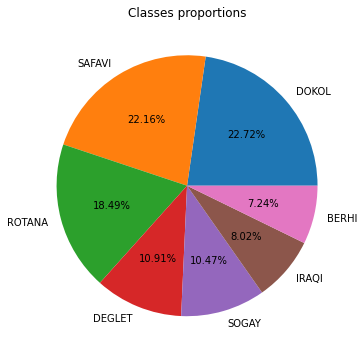

In [10]:
# lets see the class imbalance
class_dict = class_counts.to_dict()

fig = plt.figure(figsize=(6,6))
plt.pie(x=class_dict.values(), labels=class_dict.keys(), autopct='%.2f%%')
plt.title('Classes proportions')
plt.show()

Care should be taken in the case of imbalenced classes, because models tend to be biased towards dominant classes.

# Data Cleaning, Visualizaing and Engineering Features 🧼

it's common to have data points that may represent some oddity and are excessively far away from any group, that may have happened accidently or because of a glitch, we should find those and remove them after ensuring they certainly are anomalies.

another undesired scenario could happen, is to have irrelavant columns in the data that may decline the performance of our model.

in the next cell, we're simply going to make scatter plot of every column after scaling, we're going to make use of the z-score measurments to spot any point that, deviate notably from others.

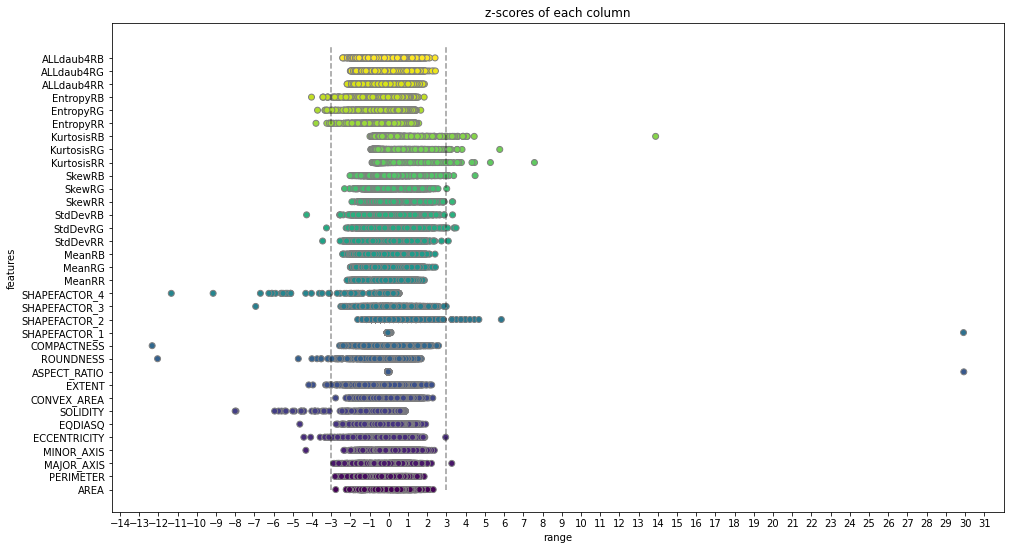

In [11]:
def scale_data(data):    # scale the data first before making any vizualisation or transformation
  if 'Class' in list(data):           # drop the Class column if any
    data_scaled = data.drop(columns='Class').apply(
      lambda x: x.sub(x.mean()).div(x.std())   # Standard Normalization, subtract the mean, 
    )                                          # and divide by the standard deviation
  else:
    data_scaled = data.apply(
        lambda x: x.sub(x.mean()).div(x.std())
    )
  return data_scaled

def visualize_outliers(data):      
  data_scaled = scale_data(data)   # scale first, after scaling, the measurments are called z-scores
  shape_scaled = data_scaled.shape 
  y = np.arange(shape_scaled[1])[np.newaxis, ...]
  y = np.repeat(y, shape_scaled[0], axis=0)  # each column of y consists solely of one number,
                                             # and it corresponds to a feature
  plt.figure(figsize=(16,9))
  plt.scatter(x=data_scaled, y=y, c=y, edgecolor='grey')  # plot each column in a separate line
  plt.vlines(-3, 0, shape_scaled[1], linestyles='dashed', alpha=0.4)
  plt.vlines(3, 0, shape_scaled[1], linestyles='dashed', alpha=0.4)
  plt.yticks(y[0], list(data_scaled.columns))
  x_lim = plt.gca().get_xlim()
  xticks = np.arange(int(x_lim[0]), int(x_lim[1]))
  plt.xticks(xticks)
  plt.xlabel('range')
  plt.ylabel('features')
  plt.title('z-scores of each column')
  plt.show()

visualize_outliers(date_data)

'ASPECT_RATIO' and 'SHAPEFACTOR_1' are severly affected by some anomalies, for each of those columns all the points are cramed around zero, except one point that is very far away, those are certainly outliers,let's find and delete them.

In [12]:
tmp = scale_data(
    date_data[['ASPECT_RATIO', 'SHAPEFACTOR_1']]
).abs()

obvious_anomalies = pd.concat([
    tmp.query('ASPECT_RATIO > 3'),        # absolute z-score greater than 3
    tmp.query('SHAPEFACTOR_1 > 3')
    ])
display(obvious_anomalies)

,ASPECT_RATIO,SHAPEFACTOR_1
615,29.93105,29.916473
615,29.93105,29.916473


it's the same point having absurd ASPECT_RATIO and SHAPEFACTOR_1 values.

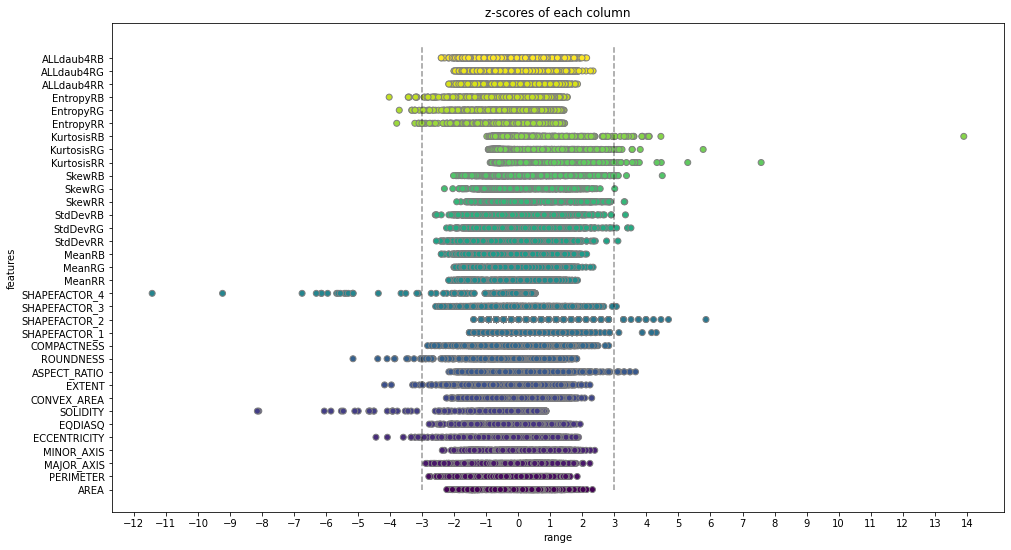

In [13]:
date_data.drop(obvious_anomalies.index[0], # drop them
               axis=0, inplace=True)
date_data = date_data.reset_index(drop=True)

visualize_outliers(date_data)
#now it's much better

now 'ASPECT_RATIO' and 'SHAPEFACTOR_1' are relaxed.

there are of course some obvious outliers but also some features are skewed beyond the [-3, +3] range.

however this plot is decieving because it comprises data points from all the classes which is of course contradictory with the fact that each class has its own characteristics.

let's do it the right, we take a particular class and plot the z-scores exclusively for this specific class.


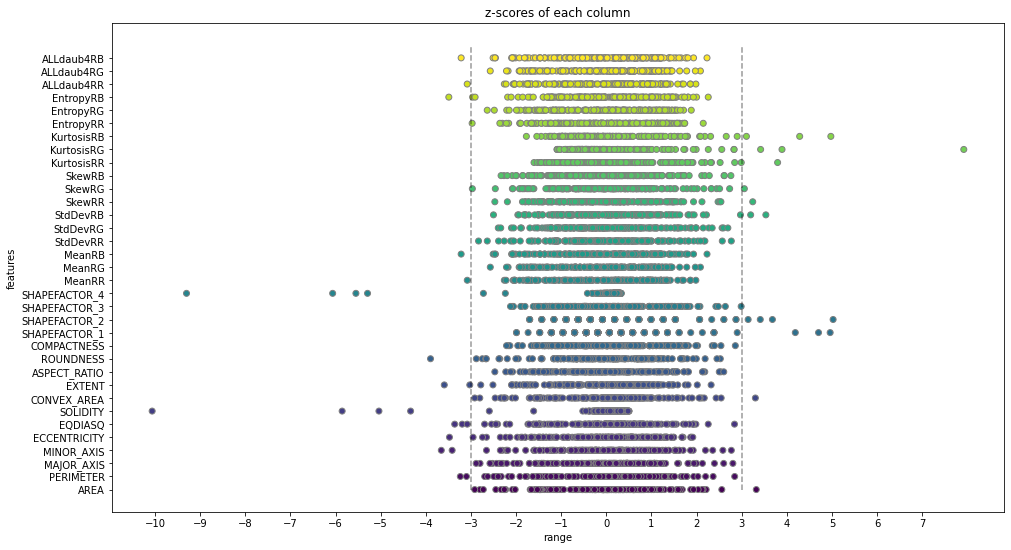

In [14]:
# let's take 'DOKOL' as example
visualize_outliers(date_data.query('Class == "DOKOL"'))

again the same problem reappear with 'SOLIDITY' and 'SHAPEFACTOR_4', although it's not with the same acuteness.

in the next cell, we'are going to build a function in order to calculate z-scores relative to each class, and then use them to penalize outliers, typically, those who have z-scores outside [-3, +3].

if any point has a feature z-score that goes outside [-3, +3], we're gonna consider it as outlier.

we're gonna also count every violation of this rule for every column.

In [15]:
def apply_z_score_rule(data, range):
  a, b = range
  outliers_per_column = data.groupby('Class').apply(lambda x: scale_data(x)) \
                                  .apply(lambda x: ~x.between(a,b))      

  # aggregate by class then,
  # check and mark the points that are outside the [a, b] range given every column

  for i, col in enumerate(outliers_per_column.columns):
    true_false = outliers_per_column[col].value_counts() # how many True, how many anomaly
    print(col, true_false.get(True, 0), end=' '*(20 - len(col)))
    if (i+1) % 5 == 0:
      print()

  # now let's see how many points that have any of their features goes outside the [a, b] range 
  is_outlier = pd.Series(index = data.index, dtype=bool)  # initiating, all False
  for col in outliers_per_column.columns:
    is_outlier = is_outlier | outliers_per_column[col]  # if any of the its columns is True than the point is an outlier
  print(f"\n\nNumber of outliers in {is_outlier.shape[0]} data points is: ", is_outlier.value_counts().get(True, 0))

  return is_outlier

is_outlier = apply_z_score_rule(date_data, [-3,3])

AREA 1                PERIMETER 4           MAJOR_AXIS 1          MINOR_AXIS 4          ECCENTRICITY 10        
EQDIASQ 3             SOLIDITY 17            CONVEX_AREA 1         EXTENT 4              ASPECT_RATIO 1        
ROUNDNESS 9           COMPACTNESS 2         SHAPEFACTOR_1 9       SHAPEFACTOR_2 10       SHAPEFACTOR_3 5       
SHAPEFACTOR_4 19       MeanRR 2              MeanRG 2              MeanRB 2              StdDevRR 2            
StdDevRG 1            StdDevRB 4            SkewRR 3              SkewRG 3              SkewRB 4              
KurtosisRR 10          KurtosisRG 10          KurtosisRB 7          EntropyRR 6           EntropyRG 5           
EntropyRB 5           ALLdaub4RR 2          ALLdaub4RG 2          ALLdaub4RB 2          

Number of outliers in 897 data points is:  86


as expected 'SOLIDITY' and 'SHAPEFACTOR_4' represent many outliers, it seems like something is going wrong with these two features. 

In [16]:
# if we want to be more tolerant
_ = apply_z_score_rule(date_data, [-4,4])

AREA 0                PERIMETER 0           MAJOR_AXIS 0          MINOR_AXIS 0          ECCENTRICITY 1        
EQDIASQ 0             SOLIDITY 7            CONVEX_AREA 0         EXTENT 0              ASPECT_RATIO 0        
ROUNDNESS 3           COMPACTNESS 0         SHAPEFACTOR_1 4       SHAPEFACTOR_2 1       SHAPEFACTOR_3 0       
SHAPEFACTOR_4 9       MeanRR 1              MeanRG 0              MeanRB 0              StdDevRR 0            
StdDevRG 0            StdDevRB 1            SkewRR 0              SkewRG 0              SkewRB 1              
KurtosisRR 3          KurtosisRG 5          KurtosisRB 5          EntropyRR 1           EntropyRG 1           
EntropyRB 1           ALLdaub4RR 1          ALLdaub4RG 0          ALLdaub4RB 0          

Number of outliers in 897 data points is:  29


In [17]:
# each class contribution of outlier points
date_data[is_outlier].Class.value_counts()
# outliers classes counts

DOKOL     19
SAFAVI    18
ROTANA    17
SOGAY      9
BERHI      8
IRAQI      8
DEGLET     7
Name: Class, dtype: int64

we won't remove those outliers now before we're sure that we're gonna be using all the features, because we may want to drop some columns.
the idea if a certain column is causing problems immensly, we'd better drop it than dropping rows.

let's move at the moment to visualize histograms of each feature to gain insight about each class distribution, ad maybe extract any useful information.

In [18]:
# function to help us
def plot_histogram_by_class(column, ax, bins=20, legend=False):  # take a column, an ax
  col = date_data[column]                                        # and plot a histogram
  _, bins = np.histogram(col, bins=bins)
  colors = ['#008000', '#FF0000', '#00FF00', '#0000FF', '#FFFF00', '#00FFFF', '#FF00FF']
  for i, Class in enumerate(classes):   # each class' distribution
    ax.hist(col[date_data['Class'] == Class], bins=bins, 
            color=colors[i], alpha=.5, label=Class,
            edgecolor='black')
  ax.set_yticks(())
  ax.set_title(column)
  ax.set_xlabel('Column Magnitude')
  ax.set_ylabel('Frequency')
  if legend:
    ax.legend(loc='best')

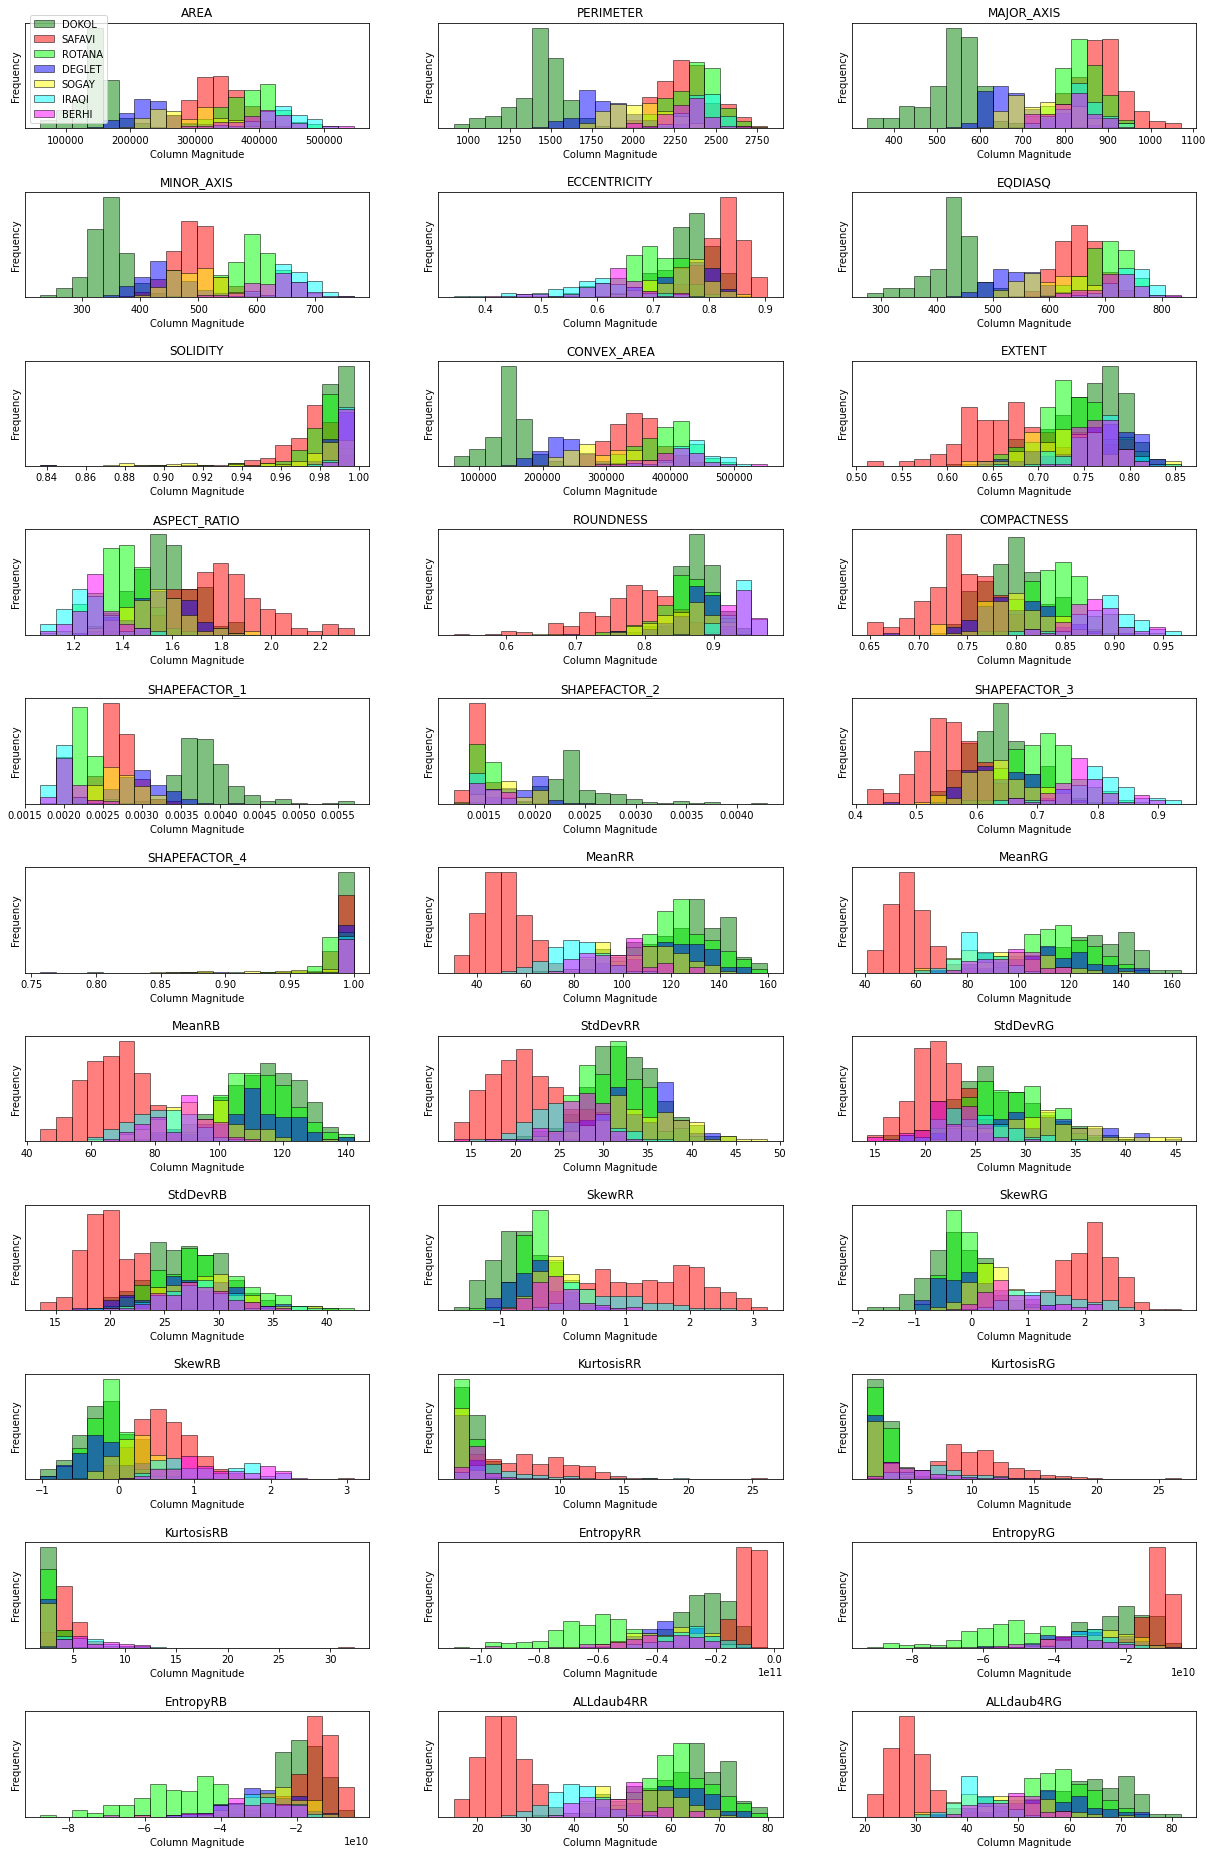

In [19]:
nrows, ncols = 11, 3
fig, axes = plt.subplots(nrows=nrows, ncols=ncols,
                         figsize=(7 * ncols, 3 * nrows))
plt.subplots_adjust(hspace=0.6)
for i in range(nrows * ncols):
  plot_histogram_by_class(date_data.columns[i], axes.ravel()[i],
                          legend=(True if i == 0 else False))

it seems like 'SAFAVI' has a very distinctive distribution in the most of the features, as well as 'DOKOL' in a lesser extent,
'DOKOL' is determined by most of the first 12 features, while 'SAFAVI' is determined by most of other features, we can see it evidently from the distributions where a class disentangle itself clearly from others, we suspect that 'DOKOL' and 'SAFAVI' will get easily classified by models,
however for other classes, it's not clear at all.

on the other hand, it looks like SOLIDITY and SHAPEFACTOR_4 are uninformative 
since the class distributions are utterly undistinguishable.

before applying any machine learning algorithm let's first set aside a test set, we are gonna use stratified splitting to keep proportions of each class, since we have imbalenced classes and little data.

In [20]:
from sklearn.model_selection import StratifiedShuffleSplit
stratified_split = StratifiedShuffleSplit(      # stratified split
    n_splits=1, test_size=0.1, random_state=0
)
for train_index, test_index in stratified_split.split(date_data, date_data.Class):
  pass    # only one split, save the indexes

test_data = date_data.iloc[test_index].reset_index(drop=True)     
train_data = date_data.iloc[train_index].reset_index(drop=True)

#make sure that proportions are kept along for each set
train_class_frequencies = date_data.iloc[train_index].\
                          Class.value_counts().to_frame().\
                          apply(lambda x: x.div(x.sum())).\
                          rename(columns = dict(Class='train_class_frequencies'))

test_class_frequencies  = date_data.iloc[test_index].\
                          Class.value_counts().to_frame().\
                          apply(lambda x: x.div(x.sum())).\
                          rename(columns = dict(Class='test_class_frequencies'))

# we can see that classes frequencies are almost identical
display(train_class_frequencies.join(test_class_frequencies))

,train_class_frequencies,test_class_frequencies
DOKOL,0.228005,0.222222
SAFAVI,0.220570,0.222222
ROTANA,0.184634,0.188889
DEGLET,0.109046,0.111111
SOGAY,0.105328,0.100000
IRAQI,0.080545,0.077778
BERHI,0.071871,0.077778


In [21]:
# let's create an utility function to help us plot heatmaps 
# since we are going to have many outputs in the from of array scores
# along the notebook
def plot_heatmap(scores, col_labels=None, row_labels=None, labels=None,
                 xlabel=None, ylabel=None, cmap='viridis', cbar=False,
                 cbar_label=None, title=None, figsize=None):
  nrows, ncols = scores.shape
  if figsize is None:
    figsize=(4 * ncols, 4 * nrows)
  fig, ax = plt.subplots(figsize=figsize)
  im = ax.imshow(scores, cmap=cmap)
  ax.set_xticks(())
  ax.set_yticks(())
  if row_labels is not None:
    ax.set_xticks(np.arange(ncols))
    ax.set_xticklabels(col_labels, fontdict={'fontsize':12})
  if row_labels is not None:
    ax.set_yticks(np.arange(nrows))
    ax.set_yticklabels(row_labels, rotation=90, va='center', fontdict={'fontsize':12})
  if title is not None:
    ax.set_title(title, fontdict={'fontsize':figsize[0]})
  if xlabel is not None:
    ax.set_xlabel(xlabel)
  if ylabel is not None:
    ax.set_ylabel(ylabel)

  if cbar:        # if colorbar is requested
    cbar = ax.figure.colorbar(im, ax=ax)
  if cbar_label is not None:
    cbar.ax.set_ylabel(cbar_label, rotation=90, va='top', fontdict={'fontsize':figsize[1]})

  # scores, and annotations if any
  for i in range(nrows):
    for j in range(ncols):
      if labels is not None and len(labels) > i*ncols + j: # if annotations (labels) are given
        text = str(scores[i, j]) + '\n' + labels[i*ncols + j]
      else:
        text = scores[i, j]
      ax.text(j, i, text,
              ha='center', va='center', color='grey',
              fontdict={'fontsize':14, 'fontweight':'bold'})
  plt.show()

we need something to help us asses and quantify the useability of each feature, here for a first try we're going to utilize ANOVA, a univariate statistics for automatique feature selection, it looks for statistical relationships between each feature and the target, it considers each featue at a time, which neglect the correlation between features. 

In [22]:
from sklearn.feature_selection import SelectPercentile
select = SelectPercentile(percentile=100)
select.fit(scale_data(train_data), train_data['Class'])

SelectPercentile(percentile=100)

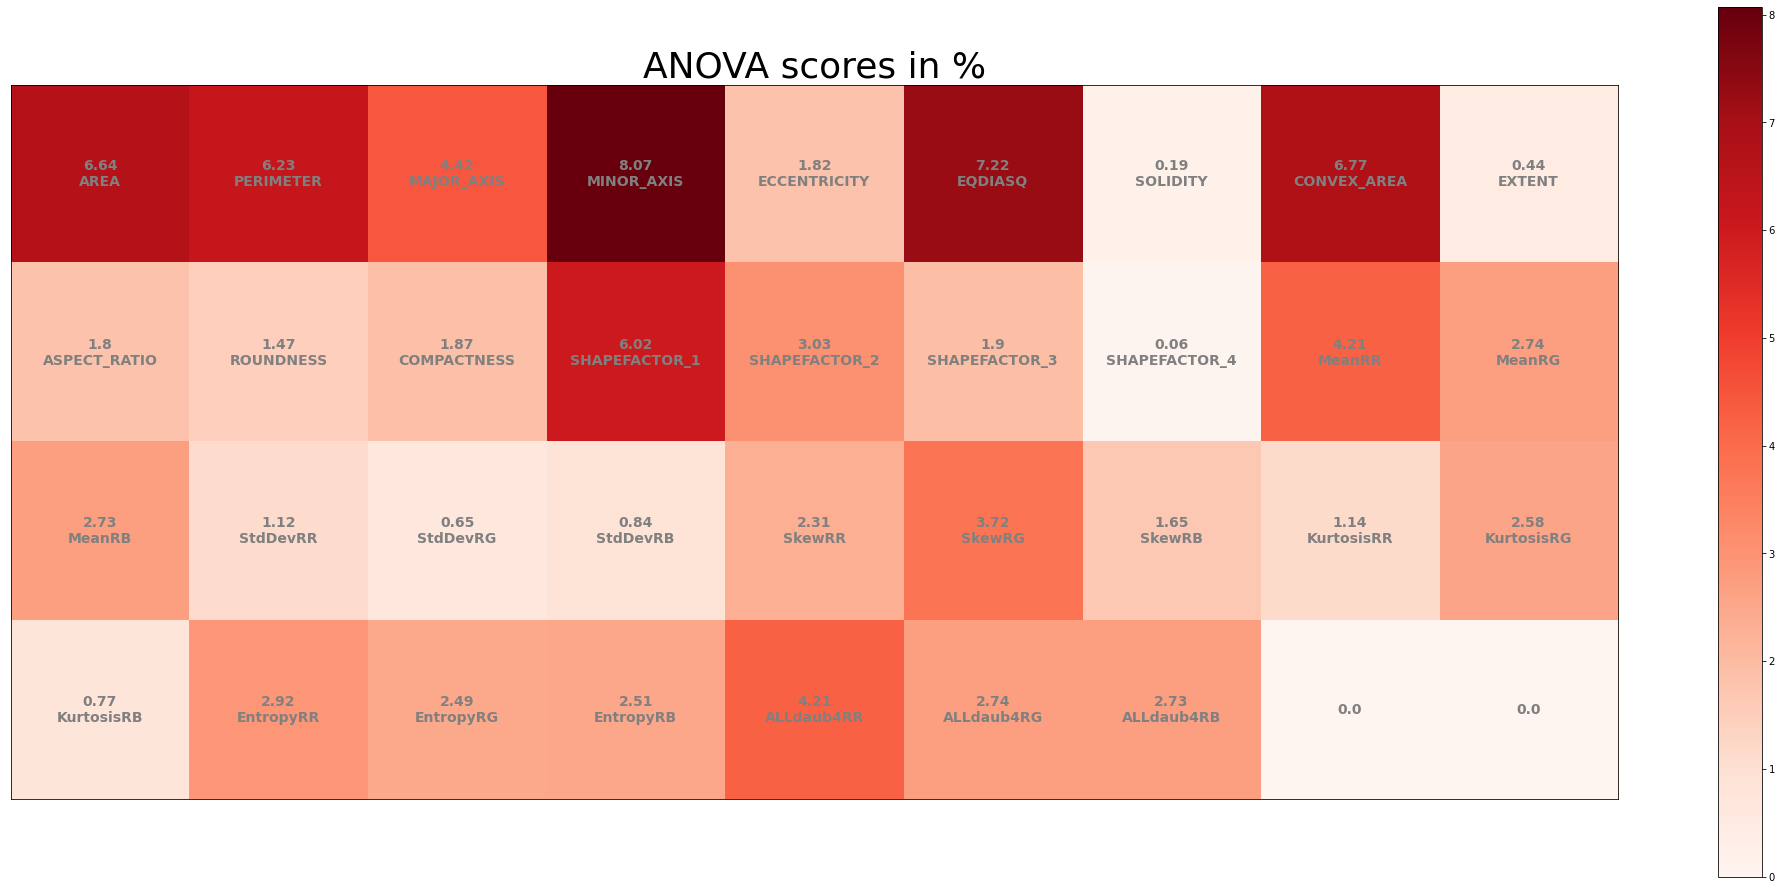

In [23]:
scores = select.scores_
scores = scores / scores.sum() * 100 
scores = np.round(scores, 2)
scores = np.append(scores, [0, 0]).reshape((4, 9))

plot_heatmap(scores, labels=list(train_data)[:-1], 
             title="ANOVA scores in %", cmap='Reds', cbar=True)

again 'SOLIDITY' and 'SHAPEFACTOR_4' are way too less informative let's remove them.

however let's don't get taken in by these scores because it's only the correlation between a given feature and the target that is in play, which dismiss the assumption of interdependence between features.

In [24]:
train_data.drop(columns=['SOLIDITY', 'SHAPEFACTOR_4'], inplace=True)
test_data.drop(columns=['SOLIDITY', 'SHAPEFACTOR_4'], inplace=True)

let's use a first Random Forest just to gain insight again about the feature importances,
we will restrict the trees to have a minimum split leaf greater than 1 to avoid influence of noise.

In [25]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=100, min_samples_leaf=2).fit(
    train_data.drop(columns=['Class']), train_data['Class'])

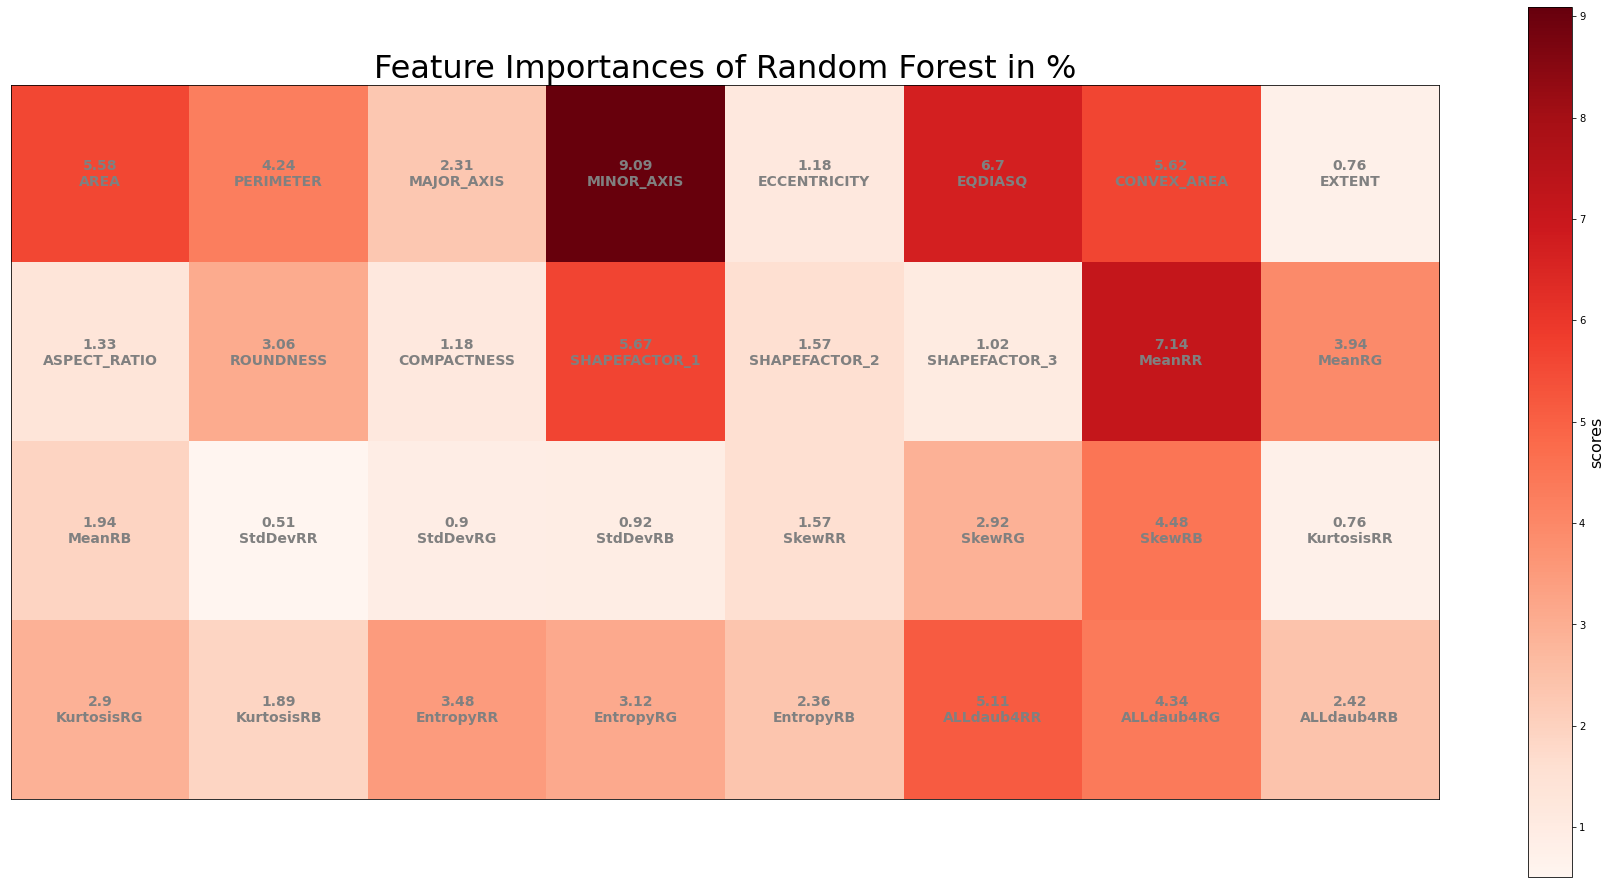

In [26]:
scores = forest.feature_importances_
scores = scores / scores.sum() * 100 
scores = np.round(scores, 2).reshape((4, 8))

plot_heatmap(scores, labels=list(train_data)[:-1], 
             title="Feature Importances of Random Forest in %", cbar_label="scores", cmap='Reds', cbar=True)

still not sure of we're going to give up any other columns here
instead of that let's look for outliers using some more advanced tricks 
like unsupervised learning

let's use DBSCAN algorithm, we're gonnna be too tolerant and use min_samples=2 and search for a decent eps, eps determines how close the points are to form a cluster, min_samples is the minimum size of a cluster.

In [27]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

# DBSCAN needs the data to be scaled
train_data_scaled = StandardScaler().fit_transform(train_data.drop(columns='Class'))
eps_range = np.linspace(1, 3, 11)   # search for eps in [1,3]
for eps in eps_range:                                # for every eps print the unique cluster labels
  dbscan = DBSCAN(min_samples=2, eps=eps)            # and their counts
  dbscan_labels = dbscan.fit_predict(train_data_scaled)   # the noisy points are assigned a label of -1
  unique_labels, counts = np.unique(dbscan_labels, return_counts=True)
  print(f'eps={eps:.2}: \n\tunique labels:  {list(unique_labels)} \n\tcounts:\t\t{list(counts)}')

eps=1.0: 
	unique labels:  [-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14] 
	counts:		[774, 3, 2, 3, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2]
eps=1.2: 
	unique labels:  [-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44] 
	counts:		[700, 4, 2, 2, 2, 3, 2, 2, 4, 2, 3, 2, 5, 3, 2, 2, 2, 2, 2, 2, 8, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
eps=1.4: 
	unique labels:  [-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71] 
	counts:		[571, 45, 3, 4, 2, 2, 2, 4, 2, 3, 2, 3, 5, 2, 4, 8, 2, 2, 2, 7, 6, 2, 2, 4, 3, 3, 2, 2, 2, 4, 5, 2, 2, 2, 2, 2, 2, 2, 3, 2, 4, 4, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 2, 2, 2, 5, 3, 2, 2, 

in our journey to detect anomalies, a value of 3 is decent here,
let's apply DBSCAN with `eps=3` and retrieve the indexes of outliers, then compare them to the ones found by our earlier apply_z_score_rule function.

In [28]:
%%capture
dbscan = DBSCAN(min_samples=2, eps=3)
dbscan_labels = dbscan.fit_predict(train_data_scaled)
outliers_mask = dbscan_labels == -1    # dealing with noise

dbscan_outliers_indexes =\
 train_data[outliers_mask].index         # indexes after DBSCAM
z_score_outliers_indexes =\
 train_data[apply_z_score_rule(train_data, [-3,3])].index  # indexes after apply_z_score_rule
intersection_outliers_indexes =\
 dbscan_outliers_indexes.intersection(z_score_outliers_indexes)  # their intersection

# comparison
print("using DBSCAN: ", sorted(list(dbscan_outliers_indexes)))
print("using z-score: ", sorted(list(z_score_outliers_indexes)))
print("outliers in common: ", sorted(list(intersection_outliers_indexes)))

notice that all outliers that are found by DBSCAN have in fact an absolute z-score greater than 3.

let's delete theme.

In [29]:
train_data = train_data.drop(intersection_outliers_indexes).reset_index(drop=True)

# Modeling and Evaluating 🖍

In [30]:
# from pandas dataframe to numpy array
X_train = train_data.drop(columns=['Class']).values
y_train = train_data['Class'].replace(classes, 
                                      np.arange(len(classes))
                                      ).values

X_test = test_data.drop(columns=['Class']).values
y_test = test_data['Class'].replace(classes, 
                                    np.arange(len(classes))
                                    ).values

# the scaled version
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

let's illustrate the idea of columns are actually correlated,
to justify the choice of not droping features for no obvious reason

to do that let's suppose the opposite, that columns are uncorrelated, then train a Naive Bayes model, and compare it to any other algorithm that take columns-correlation into account, for example a Support Vector Machine.

In [31]:
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

nb = GaussianNB().fit(X_train_scaled, y_train)
nb_test_score = nb.score(X_test_scaled, y_test)

svc = SVC(C=30, gamma=0.1, probability=True).fit(X_train_scaled, y_train)
svc_test_score = svc.score(X_test_scaled, y_test)

print("Naive Bayes test score: ", nb_test_score)
print("Support Vector Machines test score: ", svc_test_score)


Naive Bayes test score:  0.8222222222222222
Support Vector Machines test score:  0.9444444444444444


the naive bayes performed really poorly compared to svm.

Dimensionality Reduction is a mathematical technique used to transform data from high into low dimensional-space, in a way that most of information are preserved, usually used for visualizaion, the most popular technique is Principal Component Analysis, but here we use another powerful tool, t-SNE.

let's project our data into two dimensional space and plot the points.

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


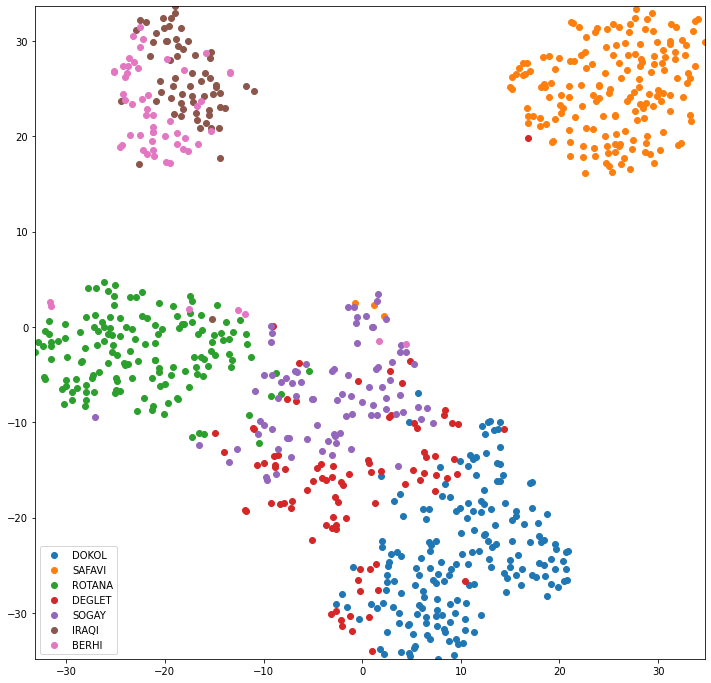

In [32]:
from sklearn.manifold import TSNE

tsne = TSNE(random_state=0)
X_train_tsne = tsne.fit_transform(X_train_scaled, y_train)

fig, ax = plt.subplots(figsize=(12, 12))
xmin, ymin = X_train_tsne.min(axis=0)
xmax, ymax = X_train_tsne.max(axis=0) 
ax.set_xlim([xmin, xmax])
ax.set_ylim([ymin, ymax])
for label in range(len(classes)):
  mask = y_train == label
  ax.scatter(X_train_tsne[mask, 0], X_train_tsne[mask, 1], label=classes[label])
ax.legend()
plt.show()

the classes that are separable after being downtransfromed to 2D will naturally be separable in the original dimensionality, but those that are not they may and they may not be separable in the original dimensionality.

it looks like 'SAFAVI' is the most distinguished one, as well as 'ROTANA' to a lesser extent, others look kind of overlapped,
but 'IRAQI' and 'BERHI' look totally jumbled, this may not be necessarily the case in original space.

let's train a Logistic Regression and a KNN and look up the confusion matrix, we chose KNN (this model classifies points based on nearest neighbors) to see if this pattern still the same in the original space, in parallel we've chosen Logistic Regression for the sake of comparison.


since we have few data points, we'll be using `cross_val_predict`, dividing the training data into 5 folds training on 4 and predicting on the last, for five times.

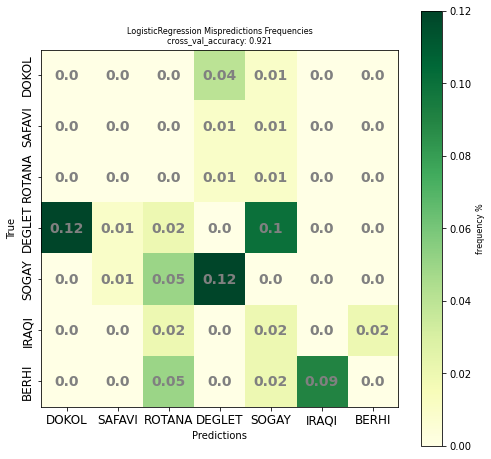

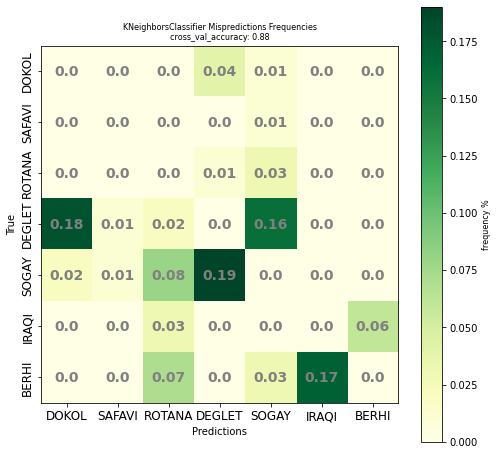

In [37]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

lr = LogisticRegression(max_iter=1000)
knn = KNeighborsClassifier(n_neighbors=5)

for model in (lr, knn):
  pipe = Pipeline([
                   ("scaler", StandardScaler()),   # we'd better scale the data first for the
                   ("model", model)                # logistic regression, for knn it dosen't matter
  ])                                               # note that we scale the data, every time we change the 
                                                   # training folds, that's why we created a pipeline
  y_pred = cross_val_predict(pipe, X_train, y_train, cv=5)
  matrix = confusion_matrix(y_train, y_pred)
  matrix = matrix / matrix.sum(axis=1)[:, np.newaxis] # normalize based on rows, to make frequencies
  matrix = np.round(matrix, 2)
  np.fill_diagonal(matrix, 0)   # zero out the diagonal, it contains correct predictions, which doesn't concern us

  acc = round(sum(y_pred == y_train) / len(y_train), 3)
  title = model.__class__.__name__ + ' Mispredictions Frequencies\n' +\
          'cross_val_accuracy: ' + str(acc)
  plot_heatmap(matrix, col_labels=classes, row_labels=classes, 
               cmap='YlGn', cbar=True, cbar_label='frequency %', 
               title=title, xlabel='Predictions', ylabel='True', figsize=(8, 8))


the results are counter-intuitive, it turns out that
'DEGLET' and 'SOGAY' are the tow classes that get mixed up the most.

'DEGLET' is the class that get misclassified the most.

'ROTANA' is the class that get mispredicted-to the most.

as expected we have little problems in classifying 'DOKOL', 'SAFAVI' and 'ROTANA' correctly, from the first figure, we can see their True Postive Rates are 0.95, 0.98, 0.98 respectively.


let's see if One-Versus-One classification can cure this problem.

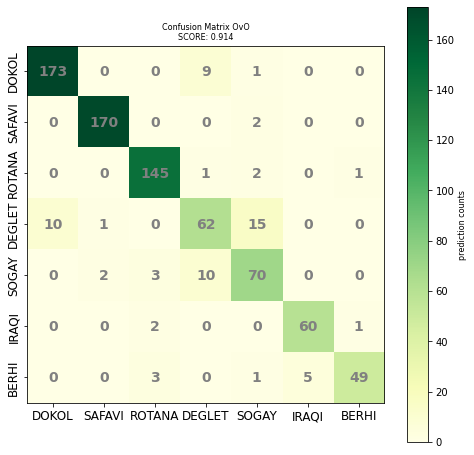

In [38]:
from sklearn.multiclass import OneVsOneClassifier

ovo = OneVsOneClassifier(LogisticRegression())
pipe = Pipeline([
                   ("scaler", StandardScaler()),
                   ("model", ovo)
  ])
y_pred = cross_val_predict(pipe, X_train, y_train, cv=3)
score = sum(y_pred == y_train) / len(y_train)
score = np.round(score, 3)
matrix = confusion_matrix(y_train, y_pred)
plot_heatmap(matrix, col_labels=classes, row_labels=classes, 
            cmap='YlGn', cbar=True, cbar_label='prediction counts', 
            title=f'Confusion Matrix OvO\nSCORE: {score}' , figsize=(8, 8))

the problems still persist yet again, One-Versus-One, hasn't improved anything.

let's move on to nonlinear models to target this problem of nonlinear-separability, let's utilize SVM and a search-grid to search for parameters (kernel & gamma).

In [39]:
from sklearn.model_selection import GridSearchCV

pipe = Pipeline([
                 ('scaler', StandardScaler()),
                 ('svm', SVC())
])

param_grid = [
          {
              'svm__kernel': ['poly'],
              'svm__degree': [2, 3],
              'svm__gamma': 10 ** np.linspace(-2,2,9)
          },
          {
              'svm__kernel': ['rbf'],
              'svm__C': 10 ** np.linspace(-2,2,9),
              'svm__gamma': 10 ** np.linspace(-2,2,9)
          }
]

grid = GridSearchCV(estimator=pipe,
                    param_grid=param_grid,
                    cv=3,
                    n_jobs=-1)
grid.fit(X_train, y_train)

print("Best parameters: ", grid.best_params_)
print("Best cross validation accuracy: ", grid.best_score_)

Best parameters:  {'svm__C': 31.622776601683793, 'svm__gamma': 0.01, 'svm__kernel': 'rbf'}
Best cross validation accuracy:  0.9185463659147869


the best parameters for SVC are: `C=31`, `gamma=0.01` and a gaussian kernel, with a cross validation accuracy of 91.85%.

none of the polynomial models has done any good job, all inferior to 88% according to the cell below.

In [40]:
poly_mask = grid.cv_results_['param_svm__kernel'] == 'poly'
poly_results = grid.cv_results_['mean_test_score'][poly_mask]
print('results of poly svm grid search: \n', poly_results)

results of poly svm grid search: 
 [0.77192982 0.86215539 0.88847118 0.87468672 0.88095238 0.88095238
 0.88095238 0.88095238 0.88095238 0.63659148 0.84711779 0.88095238
 0.86466165 0.86466165 0.86466165 0.86466165 0.86466165 0.86466165]


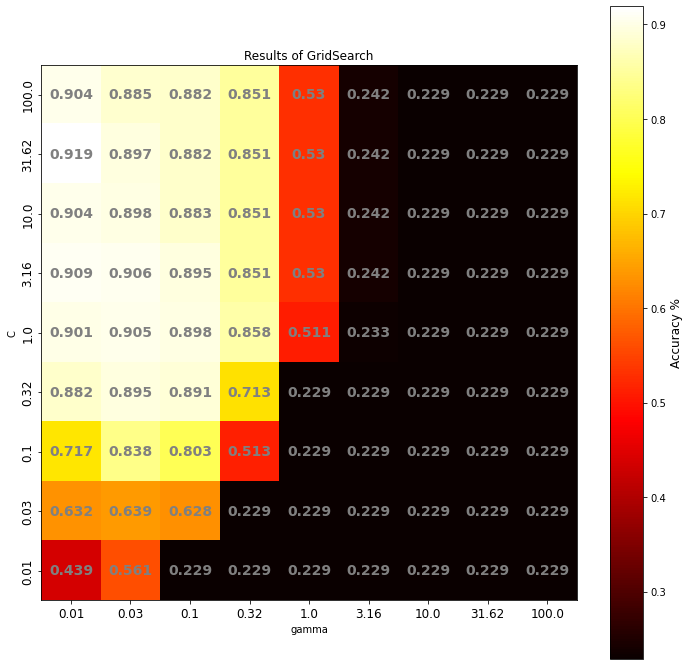

In [41]:
# let's plot a the results of gridsearch when kernel='rbf'
rbf_mask = grid.cv_results_['param_svm__kernel'] == 'rbf'   # results corresponding to 'rbf' only
rbf_results = grid.cv_results_['mean_test_score'][rbf_mask] # results
rbf_results = rbf_results.reshape((9, 9))   # square shape, C in y-axis, gamma in x-axis
rbf_results = np.round(rbf_results[::-1], 3) # round scores to 3 floating points
C_gamma = np.round(10 ** np.linspace(-2, 2, 9), 2)  # round C and gamma
plot_heatmap(rbf_results, col_labels=C_gamma, row_labels=C_gamma[::-1],   # plot
             xlabel='gamma', ylabel='C', cmap='hot', cbar=True,
             cbar_label='Accuracy %', title='Results of GridSearch',
             figsize=(12, 12))

so far, the results were a bit disappointing, lets try out some Neural Networks and judge.

since the data set is small, we're gonna use only one hidden layer.

In [42]:
import tensorflow as tf

input_shape = (len(train_data.columns) - 1, )
output_shape = n_classes

# function that serve reusability, only hidden_units and learning_rate are changeable
def get_nn_model(hidden_units=256, learning_rate=1e-3):
  inputs = tf.keras.layers.Input(shape=input_shape)
  hidden_layer = tf.keras.layers.Dense(hidden_units, 
                                       activation='sigmoid', # it's recommended to initialize weights with 'glorot' 
                                       kernel_initializer='glorot_normal')(inputs) # when activation is 'sigmoidal'
  outputs = tf.keras.layers.Dense(output_shape, 
                                  activation='softmax')(hidden_layer)  # outputs softmax probabilities

  model = tf.keras.models.Model(inputs=inputs, outputs=outputs)
  model.compile(loss='sparse_categorical_crossentropy',   # log loss, usually good for classification
                optimizer=tf.keras.optimizers.Nadam(learning_rate),   # Adaptative optimization + Nesterov momentum
                metrics=['accuracy'])

  return model

let's create a grid search by hands, to look for the best learning rate and number of units.

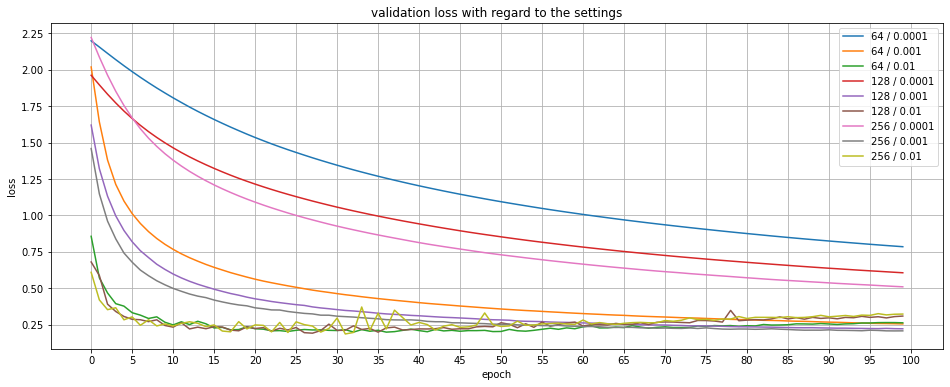

In [43]:
epochs = 100
units_search = [64, 128, 256]
lr_search = [1e-4, 1e-3, 1e-2]

fig ,ax = plt.subplots(figsize=(16,6))
for units in units_search:
  for rate in lr_search:
    model = get_nn_model(units, rate)
    h = model.fit(X_train_scaled, y_train,
              epochs=epochs,
              validation_split=0.5,   # split the data, half for training, half for validating.
              verbose=0)
    val_loss = h.history['val_loss']
    ax.plot(range(epochs), val_loss, label=f'{units} / {rate}')

ax.set_xticks(np.arange(0, epochs+1, 5))
ax.set_xlabel('epoch')
ax.set_ylabel('loss')
ax.set_title('validation loss with regard to the settings')
ax.legend()
ax.grid()

all those with learning rate 1e-4 are way too slow and still didn't converge.

those with learning rate 1e-2 had a sporadic behaviour at the beginning and ended up diverging.

others with learning rate 1e-3 converged steadily and smoothly,
the number of hidden units seem not to make in this setting.


now let's retrain the model with `hidden_units=256` and `learning_rate=1e-3`, we're gonna stop at epoch 50, to avoid overfitting.


In [44]:
nn_model = get_nn_model(hidden_units=256, learning_rate=1e-3)
nn_model.fit(X_train_scaled, y_train,
             epochs=50,
            )

Epoch 1/50
25/25 [==============================] - 1s 2ms/step - loss: 1.4631 - accuracy: 0.5752
Epoch 2/50
25/25 [==============================] - 0s 1ms/step - loss: 0.9541 - accuracy: 0.6692
Epoch 3/50
25/25 [==============================] - 0s 2ms/step - loss: 0.7427 - accuracy: 0.7569
Epoch 4/50
25/25 [==============================] - 0s 1ms/step - loss: 0.6332 - accuracy: 0.8083
Epoch 5/50
25/25 [==============================] - 0s 2ms/step - loss: 0.5537 - accuracy: 0.8346
Epoch 6/50
25/25 [==============================] - 0s 2ms/step - loss: 0.5056 - accuracy: 0.8534
Epoch 7/50
25/25 [==============================] - 0s 2ms/step - loss: 0.4652 - accuracy: 0.8647
Epoch 8/50
25/25 [==============================] - 0s 2ms/step - loss: 0.4330 - accuracy: 0.8772
Epoch 9/50
25/25 [==============================] - 0s 2ms/step - loss: 0.4093 - accuracy: 0.8860
Epoch 10/50
25/25 [==============================] - 0s 2ms/step - loss: 0.3872 - accuracy: 0.8885
Epoch 11/50
25/25 [

not that impressive with a training accuracy of 94%.

let's make decision based on f1_score over the test set, we use 'micro' average because we care about each sample since we have imbalenced classes, on our way let's also display the classification report for each model.

GaussianNB
************************************************************
              precision    recall  f1-score   support

       DOKOL       0.90      0.95      0.93        20
      SAFAVI       0.95      1.00      0.98        20
      ROTANA       0.94      0.88      0.91        17
      DEGLET       0.78      0.70      0.74        10
       SOGAY       0.75      0.67      0.71         9
       IRAQI       0.56      0.71      0.63         7
       BERHI       0.33      0.29      0.31         7

    accuracy                           0.82        90
   macro avg       0.74      0.74      0.74        90
weighted avg       0.82      0.82      0.82        90


LogisticRegression
************************************************************
              precision    recall  f1-score   support

       DOKOL       0.90      0.95      0.93        20
      SAFAVI       0.95      0.95      0.95        20
      ROTANA       0.89      1.00      0.94        17
      DEGLET       0.89      0.80

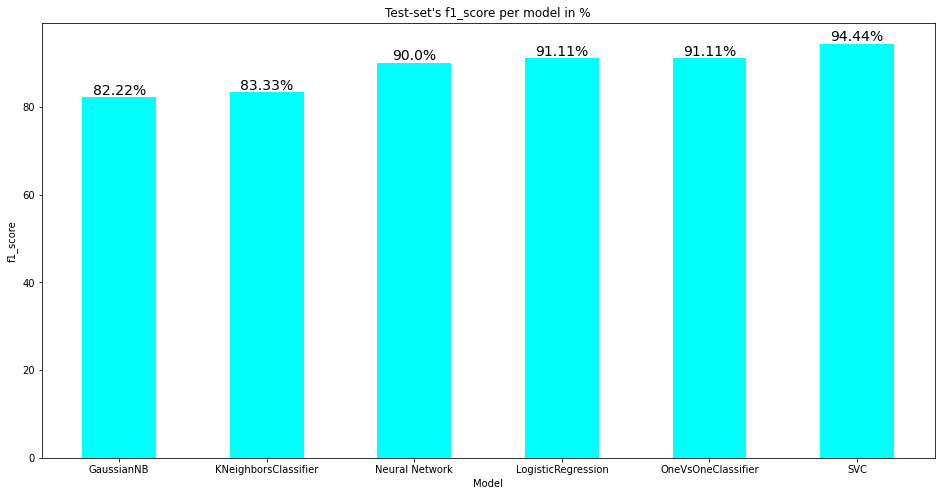

In [45]:
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

lr.fit(X_train_scaled, y_train)   # these
ovo.fit(X_train_scaled, y_train)  # are still
knn.fit(X_train_scaled, y_train)  # not trained

models, f1_scores = list(), list()
for model in (nb, lr, ovo, svc, knn):
  y_pred = model.predict(X_test_scaled)    # test-set predictions
  model_name = model.__class__.__name__
  models.append(model_name)
  f1_scores.append(f1_score(
      y_test, y_pred, average="micro") * 100)   # 'micro'
  print(model_name, 60*'*', sep='\n')
  print(classification_report(y_test, y_pred, target_names=classes))  
  print()    # classification report, using test data

# NN model yields probabilities instead of on class
y_pred = np.argmax(nn_model.predict(X_test_scaled), axis=1) 
models.append('Neural Network')
f1_scores.append(f1_score(
      y_test, y_pred, average="micro") * 100)
print('Neural Network', 30*'*', sep='\n')
print(classification_report(y_test, y_pred, target_names=classes))


sorted_scores = sorted(zip(f1_scores, models))  # sort test f1_scores
sorted_scores = list(zip(*sorted_scores))  # two list, scores and names (sorted)

fig = plt.figure(figsize=(16, 8))
plt.bar(sorted_scores[1], sorted_scores[0], color='cyan', width=0.5)
xs = fig.gca().get_xticks()
for i, x in enumerate(xs):
  acc = round(sorted_scores[0][i], 2)
  plt.text(x, sorted_scores[0][i], str(acc)+'%', 
           ha='center', va='bottom', fontdict={'fontsize':14, 'color':'k'})
plt.xlabel('Model')
plt.ylabel('f1_score')
plt.title("Test-set's f1_score per model in %")
plt.show()

from the classification reports we observe that KNN and NB has struggled to classifiy 'IRAQI' and 'BERHI'.

LR did a nice job but looks excessively prudent in assigning the 'SOGAY' class, got only 6 out of 9, and a precision of 1/1.

OvO disappointingly hasn't improved anything over the original LR .

NN have done equally, and SVC is the absolute winner.




# Wrapping Up 🔚

to wrap things up, we have decided to utilize the Support Vector Machines, we're going to create a function that take new data and output the predicted class along with the probabilities of each class in descending order, but befor that the new data may come incomplete, so we're gonna fill the missing features with the median over the training data, then aplly the same scaler, to subtract the mean and divide by the standard deviation as we did with the training data.

In [46]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')
imputer.fit(X_train_scaled)   # median of each column of train_data

def add(*args):   # utility to add up arrays of strings
  sum = args[0]
  for a in args[1:]:
    sum = np.core.defchararray.add(sum, a)
  return sum

def predict(X_new):
  n = len(X_new)
  m = n_classes
  X_new = scaler.transform(X_new)             # scale X_new
  X_new = imputer.transform(X_new)            # impute X_new
  y_new = svc.predict(X_new)                  # predict
  y_proba = svc.predict_proba(X_new)          # prediction probabilites
  y_proba = np.round(100 * y_proba, 2)        # to percentages
  indexes = np.argsort(y_proba, axis=1)       # sorting indexes
  y_proba = np.sort(y_proba, axis=1)          # sorted probas
  y_proba = np.array(y_proba, dtype='<U4')    # to strings
  names = np.tile(classes, n).reshape((n,-1)) # duplicate class names and make array
  names = names[np.arange(n), indexes.T].T    # rearrange them according to indexes
  printed = add(names,                        # concatenate strings
                np.tile(': ', (n,m)),
                y_proba,
                np.tile('%', (n,m)))
  printed = np.fliplr(printed)                # flip columns, we want descendeing order
   
  return dict(preds=y_new,                    # return predictions, and probas
              probas=printed)

let's sample 10 points from the test set, and demonstrate our pervious created function.

In [47]:
# demonstration
n_samples = 10
rng = np.random.RandomState(1)
idx = rng.randint(len(X_test), size=n_samples)
X_new = X_test[idx]
y_new = y_test[idx]
dict_new = predict(X_new)

print('true_labels', y_new)
print('predictions', dict_new['preds'])
print('\nprobabilities:', *dict_new['probas'].tolist(), sep='\n')

true_labels [4 1 0 6 5 4 3 4 1 2]
predictions [4 1 0 6 5 4 3 1 1 2]

probabilities:
['SOGAY: 51.5%', 'ROTANA: 37.2%', 'BERHI: 8.88%', 'DEGLET: 1.44%', 'IRAQI: 0.46%', 'DOKOL: 0.23%', 'SAFAVI: 0.18%']
['SAFAVI: 97.7%', 'SOGAY: 0.87%', 'DEGLET: 0.38%', 'DOKOL: 0.29%', 'IRAQI: 0.27%', 'ROTANA: 0.24%', 'BERHI: 0.22%']
['DOKOL: 78.3%', 'DEGLET: 7.75%', 'SAFAVI: 3.78%', 'SOGAY: 3.17%', 'IRAQI: 2.74%', 'BERHI: 2.11%', 'ROTANA: 2.11%']
['BERHI: 91.4%', 'IRAQI: 7.26%', 'SOGAY: 0.28%', 'DEGLET: 0.27%', 'ROTANA: 0.25%', 'DOKOL: 0.25%', 'SAFAVI: 0.24%']
['IRAQI: 93.2%', 'BERHI: 5.02%', 'DEGLET: 0.42%', 'DOKOL: 0.35%', 'SOGAY: 0.33%', 'SAFAVI: 0.32%', 'ROTANA: 0.29%']
['SOGAY: 56.2%', 'DEGLET: 25.7%', 'DOKOL: 6.22%', 'SAFAVI: 3.93%', 'ROTANA: 3.62%', 'IRAQI: 2.27%', 'BERHI: 2.01%']
['DEGLET: 97.4%', 'SOGAY: 1.77%', 'DOKOL: 0.54%', 'BERHI: 0.06%', 'SAFAVI: 0.06%', 'IRAQI: 0.05%', 'ROTANA: 0.04%']
['SAFAVI: 54.0%', 'DEGLET: 14.5%', 'IRAQI: 9.13%', 'DOKOL: 7.69%', 'SOGAY: 6.01%', 'ROTANA: 4.32%', 'BER

the eighth prediction is wrong, and the model doesn't appear to be convinced '54.0%'.

also the sixth prediction is correct but the model doesn't give a large certainty '56.2%'.

In [48]:
#END